## Setup dan Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
%matplotlib inline

## 1. Training Decision Tree Classifier

Decision tree membuat keputusan dengan cara membagi data berdasarkan feature values.

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

print(f"Jumlah sampel: {len(X)}")
print(f"Features: petal length, petal width")
print(f"Kelas: {iris.target_names}")

Jumlah sampel: 150
Features: petal length, petal width
Kelas: ['setosa' 'versicolor' 'virginica']


In [3]:
# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

print(f"Model accuracy: {tree_clf.score(X, y):.3f}")

Model accuracy: 0.960


## 2. Making Predictions

Decision tree dapat memprediksi kelas dan probability untuk setiap kelas.

In [4]:
# Predict untuk sample baru
sample = [[5, 1.5]]  # petal length=5cm, petal width=1.5cm

prediction = tree_clf.predict(sample)
probabilities = tree_clf.predict_proba(sample)

print(f"Sample: petal length={sample[0][0]}cm, petal width={sample[0][1]}cm")
print(f"Predicted class: {iris.target_names[prediction[0]]}")
print(f"Class probabilities: {probabilities[0]}")

Sample: petal length=5cm, petal width=1.5cm
Predicted class: versicolor
Class probabilities: [0.         0.90740741 0.09259259]


## 3. Visualisasi Decision Boundaries

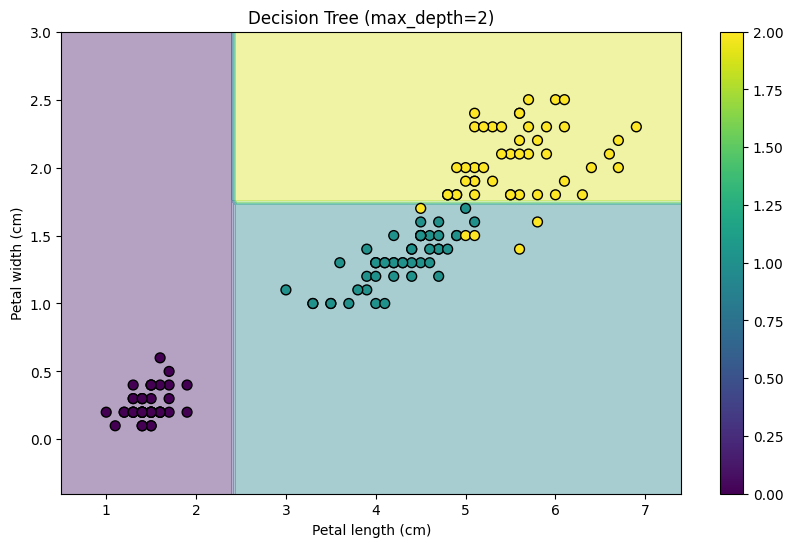

In [5]:
# Function untuk plot decision boundaries
def plot_decision_boundary(clf, X, y, title="Decision Tree"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.title(title)
    plt.colorbar()
    plt.show()

plot_decision_boundary(tree_clf, X, y, "Decision Tree (max_depth=2)")

## 4. Pengaruh max_depth Parameter

Parameter `max_depth` mengontrol kedalaman tree dan regularization:
- max_depth kecil → underfitting
- max_depth besar → overfitting

In [6]:
# Bandingkan berbagai max_depth
depths = [2, 5, 10]

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X, y)
    accuracy = model.score(X, y)
    n_leaves = model.get_n_leaves()
    print(f"max_depth={depth}: Accuracy={accuracy:.3f}, Leaves={n_leaves}")

max_depth=2: Accuracy=0.960, Leaves=3
max_depth=5: Accuracy=0.993, Leaves=8
max_depth=10: Accuracy=0.993, Leaves=8


## 5. Feature Importance

Decision tree dapat memberitahu kita feature mana yang paling penting untuk prediksi.

Petal length: 0.562
Petal width: 0.438


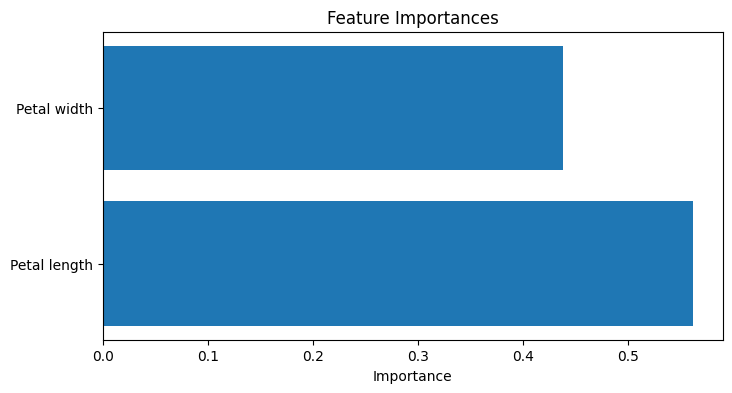

In [7]:
# Lihat feature importance
feature_names = ['Petal length', 'Petal width']
importances = tree_clf.feature_importances_

for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

# Visualisasi
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## 6. Regularization Parameters

Decision tree memiliki beberapa hyperparameter untuk regularization:
- `max_depth`: kedalaman maksimum tree
- `min_samples_split`: minimum samples untuk split node
- `min_samples_leaf`: minimum samples di setiap leaf
- `max_leaf_nodes`: maksimum jumlah leaf nodes

In [8]:
# Model dengan regularization
reg_tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

reg_tree.fit(X, y)
print(f"Regularized tree accuracy: {reg_tree.score(X, y):.3f}")
print(f"Number of leaves: {reg_tree.get_n_leaves()}")

Regularized tree accuracy: 0.973
Number of leaves: 7


## 7. Decision Tree untuk Regression

Decision tree juga bisa digunakan untuk regression tasks.

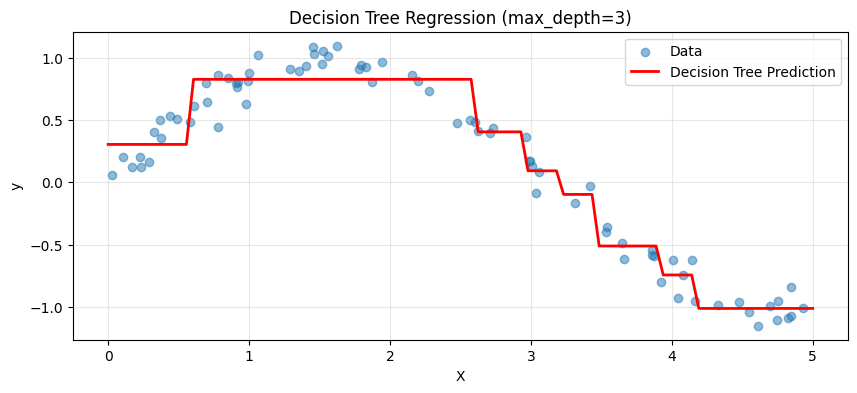

Tree depth: 3
Number of leaves: 8


In [9]:
# Generate data untuk regression
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.randn(80) * 0.1

# Train Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_reg, y_reg)

# Predict
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = tree_reg.predict(X_test)

# Visualisasi
plt.figure(figsize=(10, 4))
plt.scatter(X_reg, y_reg, alpha=0.5, label='Data')
plt.plot(X_test, y_pred, 'r-', linewidth=2, label='Decision Tree Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression (max_depth=3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Tree depth: {tree_reg.get_depth()}")
print(f"Number of leaves: {tree_reg.get_n_leaves()}")

## 8. Overfitting pada Decision Trees

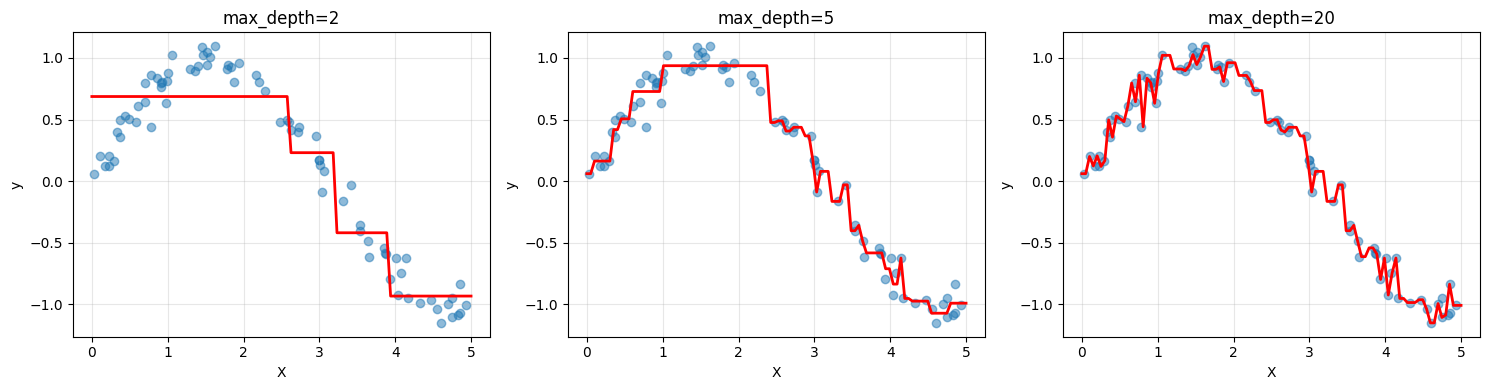

In [10]:
# Bandingkan tree dengan depth berbeda pada regression
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
depths = [2, 5, 20]

for ax, depth in zip(axes, depths):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_reg, y_reg)
    y_pred = tree.predict(X_test)
    
    ax.scatter(X_reg, y_reg, alpha=0.5)
    ax.plot(X_test, y_pred, 'r-', linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f'max_depth={depth}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Praktik dengan Train-Test Split

In [11]:
# Split Iris dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train beberapa model dengan hyperparameter berbeda
models = {
    'No Regularization': DecisionTreeClassifier(random_state=42),
    'max_depth=3': DecisionTreeClassifier(max_depth=3, random_state=42),
    'min_samples_split=10': DecisionTreeClassifier(min_samples_split=10, random_state=42)
}

print("Model Comparison:")
print("-" * 60)
for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{name:25s} | Train: {train_acc:.3f} | Test: {test_acc:.3f}")

Model Comparison:
------------------------------------------------------------
No Regularization         | Train: 0.992 | Test: 1.000
max_depth=3               | Train: 0.958 | Test: 1.000
min_samples_split=10      | Train: 0.958 | Test: 1.000


## 10. Decision Tree pada Data Non-Linear

Accuracy on moons dataset: 0.985


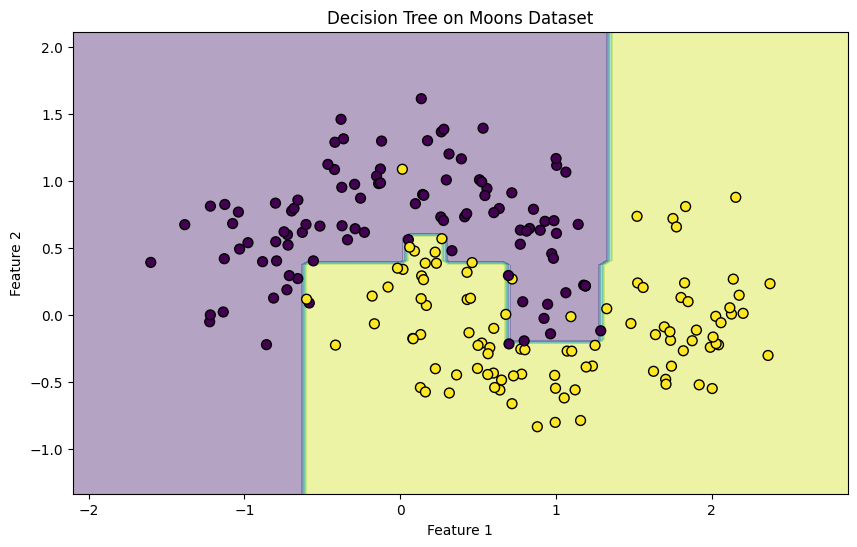

In [12]:
# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.25, random_state=42)

# Train Decision Tree
tree_moons = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_moons.fit(X_moons, y_moons)

print(f"Accuracy on moons dataset: {tree_moons.score(X_moons, y_moons):.3f}")

# Visualisasi
def plot_decision_boundary_simple(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary_simple(tree_moons, X_moons, y_moons, 
                             "Decision Tree on Moons Dataset")

## 11. Prediksi pada Data Baru

In [13]:
# Contoh prediksi pada data baru
new_samples = np.array([
    [5.0, 1.5],  # Kemungkinan Iris-virginica
    [1.5, 0.5],  # Kemungkinan Iris-setosa
    [4.0, 1.3]   # Kemungkinan Iris-versicolor
])

predictions = tree_clf.predict(new_samples)
probabilities = tree_clf.predict_proba(new_samples)

print("Predictions for new samples:")
print("-" * 70)
for i, sample in enumerate(new_samples):
    pred_class = iris.target_names[predictions[i]]
    prob = probabilities[i]
    print(f"Sample {i+1}: {sample} → {pred_class}")
    print(f"  Probabilities: {iris.target_names[0]}={prob[0]:.2f}, "
          f"{iris.target_names[1]}={prob[1]:.2f}, {iris.target_names[2]}={prob[2]:.2f}")

Predictions for new samples:
----------------------------------------------------------------------
Sample 1: [5.  1.5] → versicolor
  Probabilities: setosa=0.00, versicolor=0.91, virginica=0.09
Sample 2: [1.5 0.5] → setosa
  Probabilities: setosa=1.00, versicolor=0.00, virginica=0.00
Sample 3: [4.  1.3] → versicolor
  Probabilities: setosa=0.00, versicolor=0.91, virginica=0.09


## Kesimpulan

**Decision Trees Key Points:**

**Kelebihan:**
- Mudah dipahami dan diinterpretasi
- Tidak memerlukan feature scaling
- Bisa menangani data non-linear
- Bisa digunakan untuk classification dan regression
- Menunjukkan feature importance

**Kekurangan:**
- Mudah overfitting (terutama tanpa regularization)
- Sensitif terhadap perubahan kecil pada data
- Tidak stabil (small variations in data → very different tree)
- Bisa menghasilkan biased trees jika ada class imbalance

**Tips Penggunaan:**
- Gunakan `max_depth` untuk mencegah overfitting
- Set `min_samples_split` dan `min_samples_leaf` untuk regularization
- Selalu gunakan train-test split untuk evaluasi
- Pertimbangkan ensemble methods (Random Forests, Gradient Boosting) untuk performa lebih baik

---
## 📝 **Exercises**

### 1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?

**Jawaban:**

Approximate depth dari Decision Tree yang di-train tanpa restrictions pada training set dengan 1 juta instances adalah **sekitar 20**.

**Penjelasan:**
- Decision tree yang well-balanced memiliki depth sekitar log₂(m), dimana m adalah jumlah training instances
- log₂(1,000,000) ≈ 19.93 ≈ 20
- Ini diasumsikan tree perfectly balanced (setiap split membagi data menjadi 2 bagian yang sama)
- Dalam praktik, tree mungkin tidak perfectly balanced, sehingga depth bisa sedikit lebih besar

---
### 2. Is a node's Gini impurity generally lower or greater than its parent's? Is it generally lower/greater, or always lower/greater?

**Jawaban:**

Node's Gini impurity **generally lower or equal** than its parent's, dan **always lower or equal**.

**Penjelasan:**
- CART algorithm (used by scikit-learn) memilih split yang **memaksimalkan penurunan** Gini impurity
- Weighted average dari children nodes' Gini impurity **always ≤** parent's Gini impurity
- Ini karena algoritma hanya melakukan split jika dapat mengurangi impurity
- Jika tidak ada split yang mengurangi impurity, node menjadi leaf node

**Catatan Penting:**
- **Individual child node** bisa memiliki Gini impurity yang **lebih tinggi** dari parent
- Namun **weighted average** dari kedua children **always ≤** parent's Gini
- Formula: Gini_parent ≥ (m_left/m_total) × Gini_left + (m_right/m_total) × Gini_right

---
### 3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

**Jawaban:**

**Ya, decreasing max_depth adalah strategi yang SANGAT BAIK** untuk mengatasi overfitting pada Decision Tree.

**Alasan:**
1. **Regularization Effect**: max_depth membatasi kompleksitas model
2. **Prevents Over-specialization**: Tree yang lebih shallow tidak bisa mem-fit noise di training data
3. **Better Generalization**: Model menjadi lebih simple dan generalizable
4. **Reduces Variance**: Shallow tree lebih stabil terhadap variasi data

**Strategi Regularization Lain:**
- `min_samples_split`: Minimum samples required untuk split node
- `min_samples_leaf`: Minimum samples required di leaf node
- `max_leaf_nodes`: Batasi jumlah total leaf nodes
- `max_features`: Batasi jumlah features yang dipertimbangkan per split

**Best Practice:**
- Gunakan cross-validation untuk menemukan max_depth optimal
- Start dengan nilai kecil dan increase gradually
- Monitor train vs test performance

---
### 4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

**Jawaban:**

**TIDAK, scaling input features TIDAK akan membantu** jika Decision Tree underfitting.

**Alasan:**
1. **Scale Invariance**: Decision Tree membuat keputusan berdasarkan threshold pada individual features
2. **Relative Comparisons**: Yang penting adalah urutan relatif values, bukan skala absolutnya
3. **Not Distance-Based**: Berbeda dengan KNN atau SVM, Decision Tree tidak menghitung distances
4. **Split Logic**: Split decision (e.g., feature ≤ threshold) tidak terpengaruh oleh scaling

**Contoh:**
```
# Tanpa scaling: if petal_width <= 0.8 then class A
# Dengan scaling: if petal_width_scaled <= -0.5 then class A
# Hasil klasifikasi SAMA PERSIS, hanya threshold yang berbeda
```

**Solusi untuk Underfitting:**
1. ✅ **Increase max_depth**: Allow deeper tree
2. ✅ **Decrease min_samples_split**: Allow more splits
3. ✅ **Decrease min_samples_leaf**: Allow smaller leaves
4. ✅ **Increase max_features**: Consider more features per split
5. ✅ **Remove or relax regularization constraints**
6. ❌ **Scaling features**: TIDAK akan membantu

---
### 5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

**Jawaban:**

Training Decision Tree pada 10 million instances akan membutuhkan **sekitar 11-12 hours** (roughly **11-12x lebih lama**).

**Penjelasan:**

**Training Complexity:** O(n × m × log(m))
- n = jumlah features
- m = jumlah instances
- log(m) = approximate depth dari tree

**Perhitungan:**
```
Ratio = (m₂ × log(m₂)) / (m₁ × log(m₁))
      = (10,000,000 × log₂(10,000,000)) / (1,000,000 × log₂(1,000,000))
      = (10,000,000 × 23.25) / (1,000,000 × 19.93)
      = 232,500,000 / 19,930,000
      ≈ 11.67x
```

**Estimated Time:** 1 hour × 11.67 ≈ **11-12 hours**

**Mengapa bukan 10x?**
- Jumlah instances meningkat 10x
- Tapi depth tree juga meningkat dari log₂(1M) ≈ 20 menjadi log₂(10M) ≈ 23
- Ratio depth: 23/20 ≈ 1.17x
- Combined effect: 10 × 1.17 ≈ 11.67x

**Catatan:**
- Ini adalah rough estimate
- Actual time bisa berbeda tergantung:
  - Jumlah features
  - Distribusi data
  - Hardware specifications
  - Hyperparameters (max_depth, min_samples_split, etc.)

---
### 6. If your training set contains 100,000 instances, will setting presort=True speed up training?

**Jawaban:**

**TIDAK, setting presort=True TIDAK akan mempercepat training** untuk dataset dengan 100,000 instances. Justru akan **memperlambat significantly**.

**Alasan:**

**presort=True:**
- Pre-sorts data untuk setiap feature sebelum training
- Berguna untuk **dataset KECIL** (< 10,000 instances)
- Mempercepat pencarian split points
- Tapi memiliki **upfront cost** yang tinggi: O(n × m × log(m))

**Untuk 100,000 instances:**
- Dataset terlalu besar → presorting cost sangat tinggi
- Memory requirement doubled
- Cache performance menurun
- Overall training time **lebih lambat**

**Rule of Thumb:**
```
Dataset Size          | presort Recommendation
----------------------|------------------------
< 1,000              | presort=True ✅
1,000 - 10,000       | presort=True (marginal)
> 10,000             | presort=False ✅
100,000              | presort=False ✅✅ (strongly)
```

**Important Note:**
⚠️ Parameter `presort` telah **DEPRECATED** di scikit-learn >= 0.24
- Scikit-learn sekarang otomatis memilih strategi terbaik
- Tidak perlu manually set presort lagi
- Algorithm secara cerdas adaptif terhadap dataset size

**Kesimpulan untuk 100K instances:**
- ❌ presort=True: Memperlambat training
- ✅ presort=False (default): Optimal choice
- ✅ Don't set presort (let scikit-learn decide): Best practice

---
### 7. Train and fine-tune a Decision Tree for the moons dataset

**Task:** 
- Generate moons dataset with 10,000 samples and noise=0.4
- Split into training and test sets
- Use GridSearchCV to find optimal hyperparameters
- Train final model and evaluate (target: 85-87% accuracy)

#### 7a. Generate Moons Dataset

Dataset shape: (10000, 2)
Number of samples: 10000
Number of features: 2
Classes: [0 1]
Class distribution: Class 0: 5000, Class 1: 5000


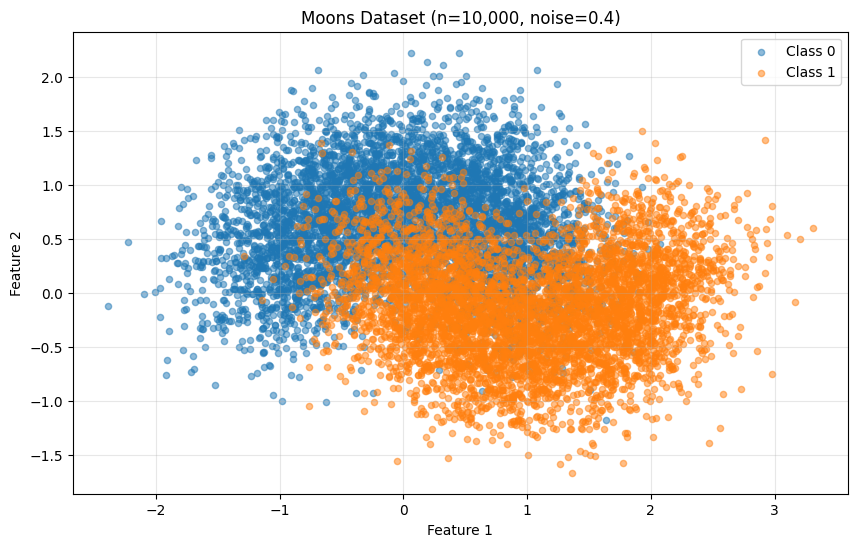

In [14]:
from sklearn.datasets import make_moons

# Generate moons dataset
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Classes: {np.unique(y)}")
print(f"Class distribution: Class 0: {np.sum(y==0)}, Class 1: {np.sum(y==1)}")

# Visualize dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], alpha=0.5, label='Class 0', s=20)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], alpha=0.5, label='Class 1', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset (n=10,000, noise=0.4)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### 7b. Split Dataset into Training and Test Sets

In [15]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training set class distribution: Class 0: {np.sum(y_train==0)}, Class 1: {np.sum(y_train==1)}")
print(f"Test set class distribution: Class 0: {np.sum(y_test==0)}, Class 1: {np.sum(y_test==1)}")

Training set size: 8000
Test set size: 2000
Training set class distribution: Class 0: 3987, Class 1: 4013
Test set class distribution: Class 0: 1013, Class 1: 987


#### 7c. Grid Search for Optimal Hyperparameters

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_leaf_nodes': [2, 5, 10, 20, 50, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Create Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Grid Search with Cross-Validation
print("Starting Grid Search with Cross-Validation...")
print(f"Parameter grid: {param_grid}")
print(f"Total combinations: {len(param_grid['max_leaf_nodes']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split'])}")

grid_search = GridSearchCV(tree_clf, param_grid, cv=5, 
                          scoring='accuracy', 
                          verbose=1,
                          n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\n" + "="*70)
print("Grid Search Results:")
print("="*70)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Best estimator: {grid_search.best_estimator_}")

Starting Grid Search with Cross-Validation...
Parameter grid: {'max_leaf_nodes': [2, 5, 10, 20, 50, 100, 200, 500, 1000], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 20]}
Total combinations: 180
Fitting 5 folds for each of 180 candidates, totalling 900 fits

Grid Search Results:
Best parameters: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 2}
Best cross-validation score: 0.8586
Best estimator: DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)


In [17]:
# Visualize top 10 best hyperparameter combinations
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)
top_10 = results_df.nlargest(10, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]

print("\nTop 10 Hyperparameter Combinations:")
print("="*70)
for idx, row in top_10.iterrows():
    print(f"Score: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f}) | Params: {row['params']}")


Top 10 Hyperparameter Combinations:
Score: 0.8586 (±0.0073) | Params: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 2}
Score: 0.8586 (±0.0073) | Params: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 5}
Score: 0.8586 (±0.0073) | Params: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 10}
Score: 0.8586 (±0.0073) | Params: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 20}
Score: 0.8586 (±0.0073) | Params: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 2}
Score: 0.8586 (±0.0073) | Params: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 5}
Score: 0.8586 (±0.0073) | Params: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 10}
Score: 0.8586 (±0.0073) | Params: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 20}
Score: 0.8586 (±0.0073) | Params: {'max_depth': 15, 'max_leaf_nodes': 20, 'min_samples_split': 2}
Score: 0.8586 (±0.0073) | Params: {'max_depth': 15, 'max_leaf_nodes':

#### 7d. Train Final Model and Evaluate on Test Set

Final Model Performance:
Best Hyperparameters: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 2}

Training Accuracy: 0.8639
Test Accuracy: 0.8700
Test Accuracy Percentage: 87.00%

Tree Statistics:
  Depth: 7
  Number of leaves: 20

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.88      0.87      1013
     Class 1       0.88      0.86      0.87       987

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
[[896 117]
 [143 844]]


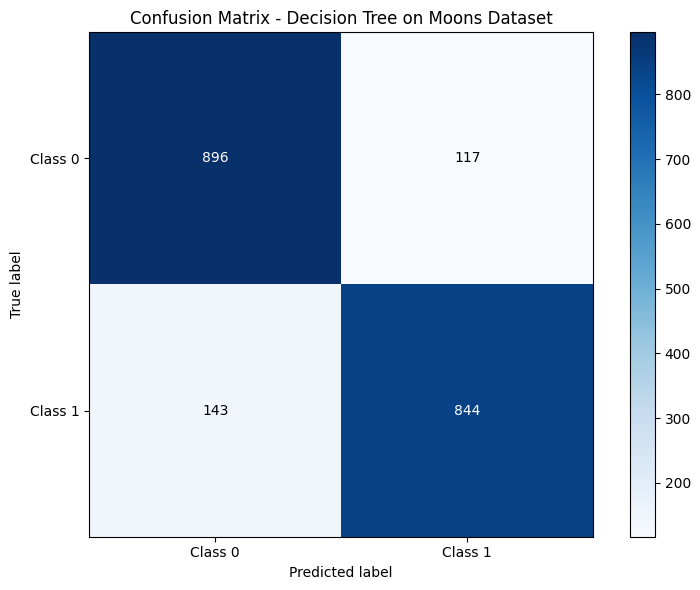


✅ Success! Test accuracy 87.00% is within target range (85-87%)


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Best model is already trained by GridSearchCV
best_tree = grid_search.best_estimator_

# Predictions on test set
y_pred = best_tree.predict(X_test)

# Calculate metrics
train_accuracy = best_tree.score(X_train, y_train)
test_accuracy = best_tree.score(X_test, y_test)

print("="*70)
print("Final Model Performance:")
print("="*70)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Accuracy Percentage: {test_accuracy*100:.2f}%")

print(f"\nTree Statistics:")
print(f"  Depth: {best_tree.get_depth()}")
print(f"  Number of leaves: {best_tree.get_n_leaves()}")

print("\n" + "="*70)
print("Classification Report:")
print("="*70)
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree on Moons Dataset')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

if test_accuracy >= 0.85 and test_accuracy <= 0.87:
    print(f"\n✅ Success! Test accuracy {test_accuracy*100:.2f}% is within target range (85-87%)")
elif test_accuracy > 0.87:
    print(f"\n🎉 Excellent! Test accuracy {test_accuracy*100:.2f}% exceeds target range!")
else:
    print(f"\n⚠️ Test accuracy {test_accuracy*100:.2f}% is below target (85-87%)")

---
### 8. Grow a Forest (Manual Random Forest Implementation)

**Task:** 
- Generate 1,000 subsets of training data (100 instances each)
- Train 1,000 Decision Trees
- Use majority voting for predictions
- Compare with single Decision Tree (should improve by 0.5-1.5%)

#### 8a. Generate 1,000 Subsets of Training Set

In [19]:
from sklearn.model_selection import ShuffleSplit

# Create ShuffleSplit to generate 1,000 subsets
# Each subset contains 100 instances
n_trees = 1000
n_instances = 100

shuffle_split = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

print(f"Creating {n_trees} subsets of training data")
print(f"Each subset size: {n_instances} instances")
print(f"Original training set size: {len(X_train)}")

# Store all subset indices
subsets = []
for train_index, _ in shuffle_split.split(X_train):
    subsets.append(train_index[:n_instances])

print(f"\nGenerated {len(subsets)} subsets")
print(f"First subset size: {len(subsets[0])}")
print(f"Sample indices from first subset: {subsets[0][:10]}")

Creating 1000 subsets of training data
Each subset size: 100 instances
Original training set size: 8000

Generated 1000 subsets
First subset size: 100
Sample indices from first subset: [4798 1500 3843 5225 2613 3461 1021 3073 7555 3943]


#### 8b. Train 1,000 Decision Trees on Subsets

In [20]:
import time

# Train 1,000 Decision Trees using best hyperparameters from previous exercise
forest = []
individual_scores = []

print(f"Training {n_trees} Decision Trees...")
print(f"Using best hyperparameters: {grid_search.best_params_}")
print("\nProgress:")

start_time = time.time()

for i, subset_indices in enumerate(subsets):
    # Get subset data
    X_subset = X_train[subset_indices]
    y_subset = y_train[subset_indices]
    
    # Create and train tree with best hyperparameters
    tree = DecisionTreeClassifier(**grid_search.best_params_, random_state=42+i)
    tree.fit(X_subset, y_subset)
    
    # Evaluate on test set
    score = tree.score(X_test, y_test)
    individual_scores.append(score)
    
    forest.append(tree)
    
    # Progress indicator
    if (i + 1) % 100 == 0:
        elapsed = time.time() - start_time
        avg_score = np.mean(individual_scores)
        print(f"  {i+1}/{n_trees} trees trained | Avg accuracy: {avg_score:.4f} | Time: {elapsed:.1f}s")

elapsed_time = time.time() - start_time

print("\n" + "="*70)
print("Training Complete!")
print("="*70)
print(f"Total trees trained: {len(forest)}")
print(f"Training time: {elapsed_time:.2f} seconds")
print(f"Average time per tree: {elapsed_time/n_trees:.4f} seconds")
print(f"\nIndividual Tree Performance on Test Set:")
print(f"  Mean accuracy: {np.mean(individual_scores):.4f}")
print(f"  Std accuracy: {np.std(individual_scores):.4f}")
print(f"  Min accuracy: {np.min(individual_scores):.4f}")
print(f"  Max accuracy: {np.max(individual_scores):.4f}")

Training 1000 Decision Trees...
Using best hyperparameters: {'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_split': 2}

Progress:
  100/1000 trees trained | Avg accuracy: 0.7987 | Time: 0.1s
  200/1000 trees trained | Avg accuracy: 0.7988 | Time: 0.3s
  300/1000 trees trained | Avg accuracy: 0.8004 | Time: 0.4s
  400/1000 trees trained | Avg accuracy: 0.8003 | Time: 0.5s
  500/1000 trees trained | Avg accuracy: 0.8009 | Time: 0.6s
  600/1000 trees trained | Avg accuracy: 0.8014 | Time: 0.8s
  700/1000 trees trained | Avg accuracy: 0.8015 | Time: 0.9s
  800/1000 trees trained | Avg accuracy: 0.8014 | Time: 1.0s
  900/1000 trees trained | Avg accuracy: 0.8011 | Time: 1.2s
  1000/1000 trees trained | Avg accuracy: 0.8009 | Time: 1.3s

Training Complete!
Total trees trained: 1000
Training time: 1.31 seconds
Average time per tree: 0.0013 seconds

Individual Tree Performance on Test Set:
  Mean accuracy: 0.8009
  Std accuracy: 0.0249
  Min accuracy: 0.7080
  Max accuracy: 0.8570


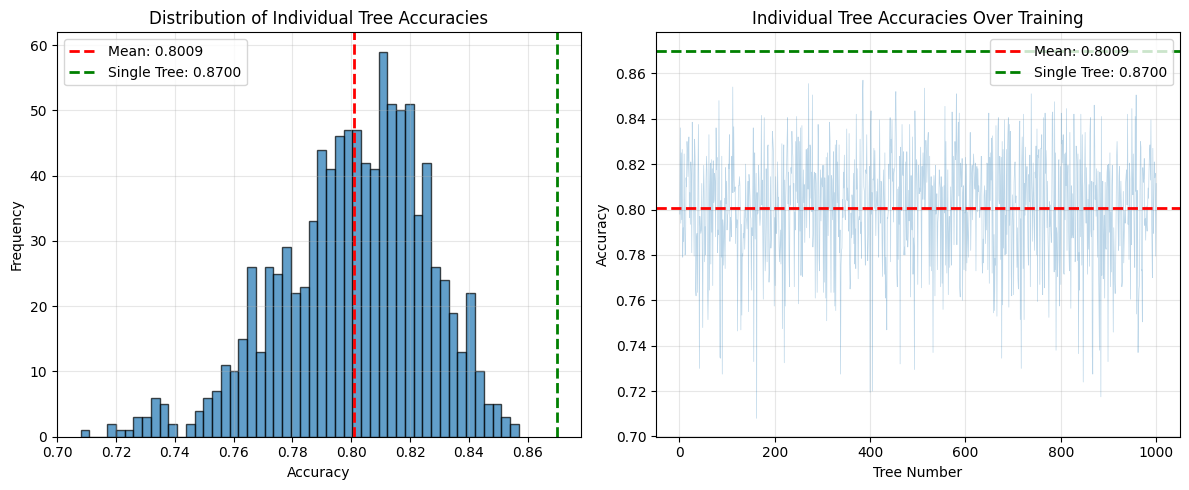

In [25]:
# Visualize distribution of individual tree accuracies
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(individual_scores, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(individual_scores), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(individual_scores):.4f}')
plt.axvline(test_accuracy, color='green', linestyle='--', linewidth=2, label=f'Single Tree: {test_accuracy:.4f}')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Individual Tree Accuracies')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(individual_scores)+1), individual_scores, alpha=0.3, linewidth=0.5)
plt.axhline(np.mean(individual_scores), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(individual_scores):.4f}')
plt.axhline(test_accuracy, color='green', linestyle='--', linewidth=2, label=f'Single Tree: {test_accuracy:.4f}')
plt.xlabel('Tree Number')
plt.ylabel('Accuracy')
plt.title('Individual Tree Accuracies Over Training')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### 8c. Generate Majority-Vote Predictions

In [22]:
from scipy.stats import mode

# Generate predictions from all 1,000 trees for each test instance
print("Generating predictions from all 1,000 trees...")

# Collect all predictions
all_predictions = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    all_predictions[tree_index] = tree.predict(X_test)

print(f"Predictions shape: {all_predictions.shape}")
print(f"(rows = trees, columns = test instances)")

# Get majority vote for each test instance
print("\nCalculating majority votes...")
y_pred_majority, n_votes = mode(all_predictions, axis=0, keepdims=False)

print(f"\nMajority vote predictions shape: {y_pred_majority.shape}")
print(f"Sample predictions (first 10): {y_pred_majority[:10]}")
print(f"Sample vote counts (first 10): {n_votes[:10]}")

# Show some examples of voting
print("\n" + "="*70)
print("Example Voting Results (first 5 test instances):")
print("="*70)
for i in range(5):
    votes_for_class_0 = np.sum(all_predictions[:, i] == 0)
    votes_for_class_1 = np.sum(all_predictions[:, i] == 1)
    print(f"Instance {i}: Class 0: {votes_for_class_0} votes, Class 1: {votes_for_class_1} votes → Prediction: {y_pred_majority[i]}, Actual: {y_test[i]}")

Generating predictions from all 1,000 trees...
Predictions shape: (1000, 2000)
(rows = trees, columns = test instances)

Calculating majority votes...

Majority vote predictions shape: (2000,)
Sample predictions (first 10): [1 1 0 0 0 1 1 1 1 0]
Sample vote counts (first 10): [943 906 960 948 729 819 922 991 852 508]

Example Voting Results (first 5 test instances):
Instance 0: Class 0: 57 votes, Class 1: 943 votes → Prediction: 1, Actual: 1
Instance 1: Class 0: 94 votes, Class 1: 906 votes → Prediction: 1, Actual: 1
Instance 2: Class 0: 960 votes, Class 1: 40 votes → Prediction: 0, Actual: 0
Instance 3: Class 0: 948 votes, Class 1: 52 votes → Prediction: 0, Actual: 1
Instance 4: Class 0: 729 votes, Class 1: 271 votes → Prediction: 0, Actual: 0


#### 8d. Evaluate Ensemble Performance (Manual Random Forest)

In [23]:
# Calculate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_majority)

print("="*70)
print("🌲 RANDOM FOREST RESULTS (Manual Implementation)")
print("="*70)

print(f"\n📊 Performance Comparison:")
print(f"  Single Decision Tree (full training set): {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Average Individual Mini-Tree:             {np.mean(individual_scores):.4f} ({np.mean(individual_scores)*100:.2f}%)")
print(f"  Ensemble (1,000 trees, majority vote):    {ensemble_accuracy:.4f} ({ensemble_accuracy*100:.2f}%)")

improvement = ensemble_accuracy - test_accuracy
improvement_pct = (improvement) * 100

print(f"\n📈 Improvement:")
print(f"  Absolute: {improvement:.4f}")
print(f"  Percentage: {improvement_pct:.2f}%")

if improvement > 0:
    print(f"\n✅ Success! Ensemble improves upon single tree by {improvement_pct:.2f}%")
    if 0.5 <= improvement_pct <= 1.5:
        print(f"   This is within expected range (0.5-1.5%)")
    elif improvement_pct > 1.5:
        print(f"   This exceeds expected improvement!")
else:
    print(f"\n⚠️ Ensemble did not improve upon single tree")

print("\n" + "="*70)
print("Classification Report - Ensemble:")
print("="*70)
print(classification_report(y_test, y_pred_majority, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_majority)
print("Confusion Matrix - Ensemble:")
print(cm_ensemble)

🌲 RANDOM FOREST RESULTS (Manual Implementation)

📊 Performance Comparison:
  Single Decision Tree (full training set): 0.8700 (87.00%)
  Average Individual Mini-Tree:             0.8009 (80.09%)
  Ensemble (1,000 trees, majority vote):    0.8725 (87.25%)

📈 Improvement:
  Absolute: 0.0025
  Percentage: 0.25%

✅ Success! Ensemble improves upon single tree by 0.25%

Classification Report - Ensemble:
              precision    recall  f1-score   support

     Class 0       0.88      0.87      0.87      1013
     Class 1       0.87      0.87      0.87       987

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix - Ensemble:
[[884 129]
 [126 861]]


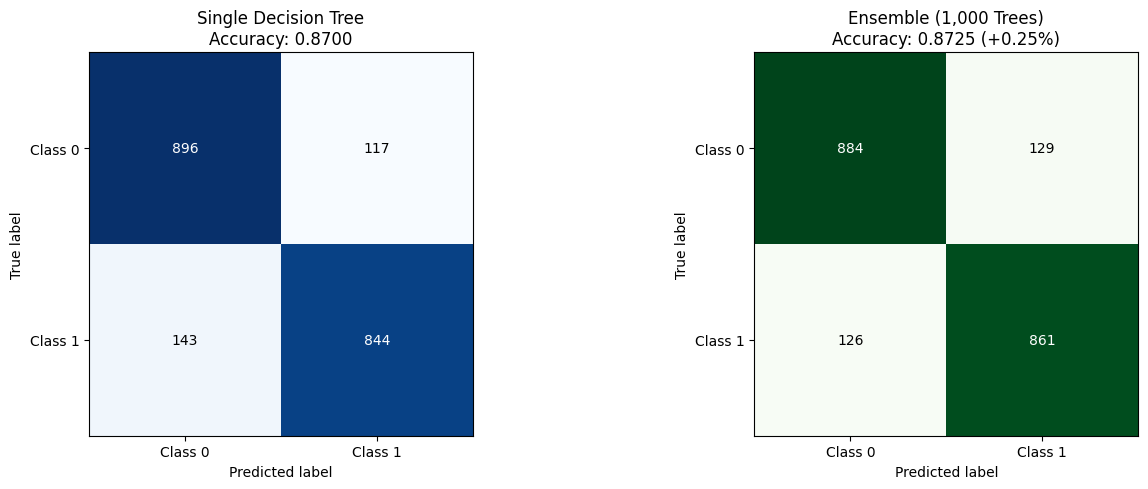

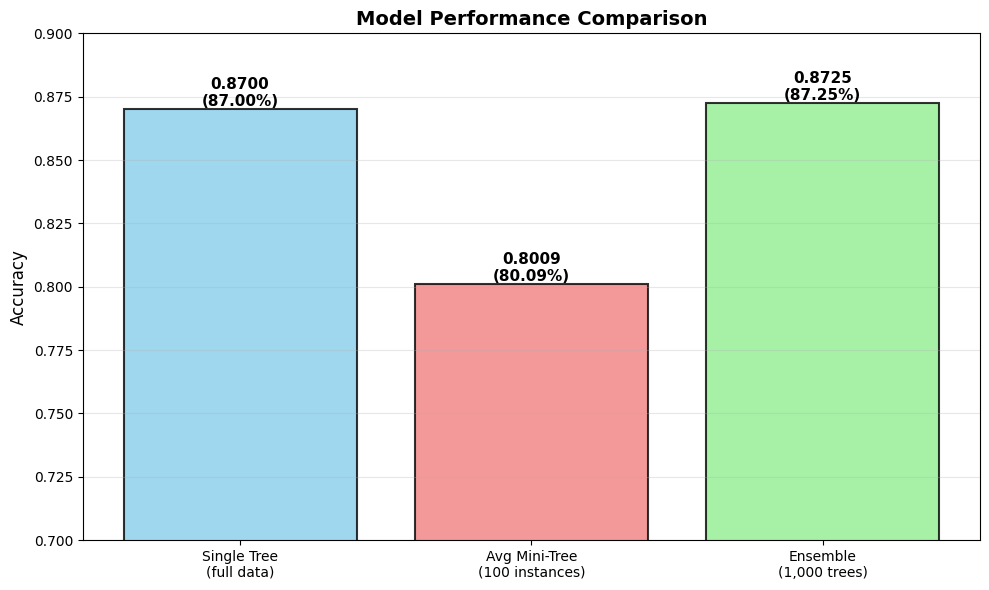

In [24]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix - Single Tree
ax1 = axes[0]
im1 = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
ax1.set_title(f'Single Decision Tree\nAccuracy: {test_accuracy:.4f}', fontsize=12)
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
tick_marks = np.arange(2)
ax1.set_xticks(tick_marks)
ax1.set_xticklabels(['Class 0', 'Class 1'])
ax1.set_yticks(tick_marks)
ax1.set_yticklabels(['Class 0', 'Class 1'])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    ax1.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

# Confusion Matrix - Ensemble
ax2 = axes[1]
im2 = ax2.imshow(cm_ensemble, interpolation='nearest', cmap='Greens')
ax2.set_title(f'Ensemble (1,000 Trees)\nAccuracy: {ensemble_accuracy:.4f} (+{improvement_pct:.2f}%)', fontsize=12)
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('True label')
ax2.set_xticks(tick_marks)
ax2.set_xticklabels(['Class 0', 'Class 1'])
ax2.set_yticks(tick_marks)
ax2.set_yticklabels(['Class 0', 'Class 1'])

thresh = cm_ensemble.max() / 2.
for i, j in np.ndindex(cm_ensemble.shape):
    ax2.text(j, i, format(cm_ensemble[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm_ensemble[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Bar chart comparison
plt.figure(figsize=(10, 6))
models = ['Single Tree\n(full data)', 'Avg Mini-Tree\n(100 instances)', 'Ensemble\n(1,000 trees)']
accuracies = [test_accuracy, np.mean(individual_scores), ensemble_accuracy]
colors = ['skyblue', 'lightcoral', 'lightgreen']

bars = plt.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}\n({acc*100:.2f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0.7, 0.9)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()